In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
train_df = pd.read_csv("soap_quality_expanded_dataset.csv")
train_df.head()

,ID,Fatty_Acid_%,Lye_%,Water_%,Fragrance_%,Temp_°C,Time_min,Curing_days,pH,Moisture_%,Glycerin_%,Additive_%,Colorant_%,Preservative_%,Batch_Size_L,Viscosity_cP,TDS_ppm,Quality
0,1,19.99,11.49,25.70,1.54,53.8,44.8,25,8.02,12.98,2.08,0.95,2.96,1.07,79,573.4,458.3,Medium
1,2,29.21,10.68,32.84,1.46,53.4,42.9,11,8.73,16.34,2.90,4.59,0.83,1.99,29,864.7,150.5,Low
2,3,25.71,9.55,39.46,0.55,67.9,37.2,14,8.71,15.21,2.98,2.77,1.19,1.60,14,1248.7,149.3,Low
3,4,23.58,12.07,36.64,1.18,53.5,48.7,13,9.19,10.04,3.83,1.50,2.06,1.69,32,264.8,159.0,Medium
4,5,16.50,11.42,38.13,1.26,54.0,26.0,20,8.41,13.52,1.60,2.15,2.44,1.27,18,984.4,111.9,Low


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              500 non-null    int64  
 1   Fatty_Acid_%    500 non-null    float64
 2   Lye_%           500 non-null    float64
 3   Water_%         500 non-null    float64
 4   Fragrance_%     500 non-null    float64
 5   Temp_°C         500 non-null    float64
 6   Time_min        500 non-null    float64
 7   Curing_days     500 non-null    int64  
 8   pH              500 non-null    float64
 9   Moisture_%      500 non-null    float64
 10  Glycerin_%      500 non-null    float64
 11  Additive_%      500 non-null    float64
 12  Colorant_%      500 non-null    float64
 13  Preservative_%  500 non-null    float64
 14  Batch_Size_L    500 non-null    int64  
 15  Viscosity_cP    500 non-null    float64
 16  TDS_ppm         500 non-null    float64
 17  Quality         500 non-null    obj

In [4]:
train_df

,ID,Fatty_Acid_%,Lye_%,Water_%,Fragrance_%,Temp_°C,Time_min,Curing_days,pH,Moisture_%,Glycerin_%,Additive_%,Colorant_%,Preservative_%,Batch_Size_L,Viscosity_cP,TDS_ppm,Quality
0,1,19.99,11.49,25.70,1.54,53.8,44.8,25,8.02,12.98,2.08,0.95,2.96,1.07,79,573.4,458.3,Medium
1,2,29.21,10.68,32.84,1.46,53.4,42.9,11,8.73,16.34,2.90,4.59,0.83,1.99,29,864.7,150.5,Low
2,3,25.71,9.55,39.46,0.55,67.9,37.2,14,8.71,15.21,2.98,2.77,1.19,1.60,14,1248.7,149.3,Low
3,4,23.58,12.07,36.64,1.18,53.5,48.7,13,9.19,10.04,3.83,1.50,2.06,1.69,32,264.8,159.0,Medium
4,5,16.50,11.42,38.13,1.26,54.0,26.0,20,8.41,13.52,1.60,2.15,2.44,1.27,18,984.4,111.9,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,19.65,8.46,35.36,1.81,58.8,46.0,10,8.29,10.66,2.30,4.25,0.30,0.36,45,1168.3,493.0,Medium
496,497,23.34,12.59,34.39,2.41,60.7,24.7,25,8.12,13.70,3.17,1.90,1.53,1.47,45,303.6,311.1,Medium
497,498,15.24,8.68,31.27,0.64,67.0,29.3,17,7.91,9.90,1.33,2.48,0.07,0.50,88,263.1,415.2,Low
498,499,29.59,12.75,29.60,0.61,69.6,28.7,8,9.22,11.66,2.88,0.04,1.22,0.98,17,782.3,436.2,High


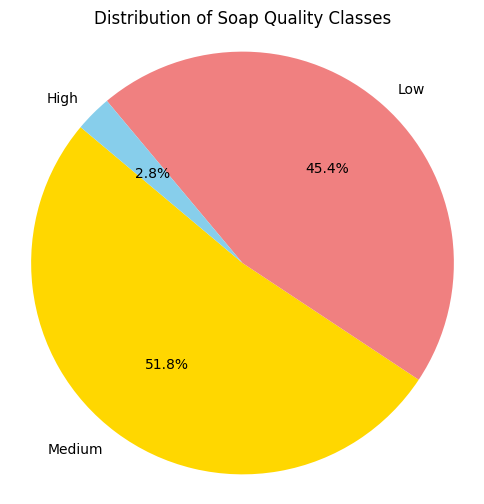

In [9]:
quality_counts = train_df['Quality'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral', 'skyblue'])
plt.title("Distribution of Soap Quality Classes")
plt.axis('equal')  
plt.show()

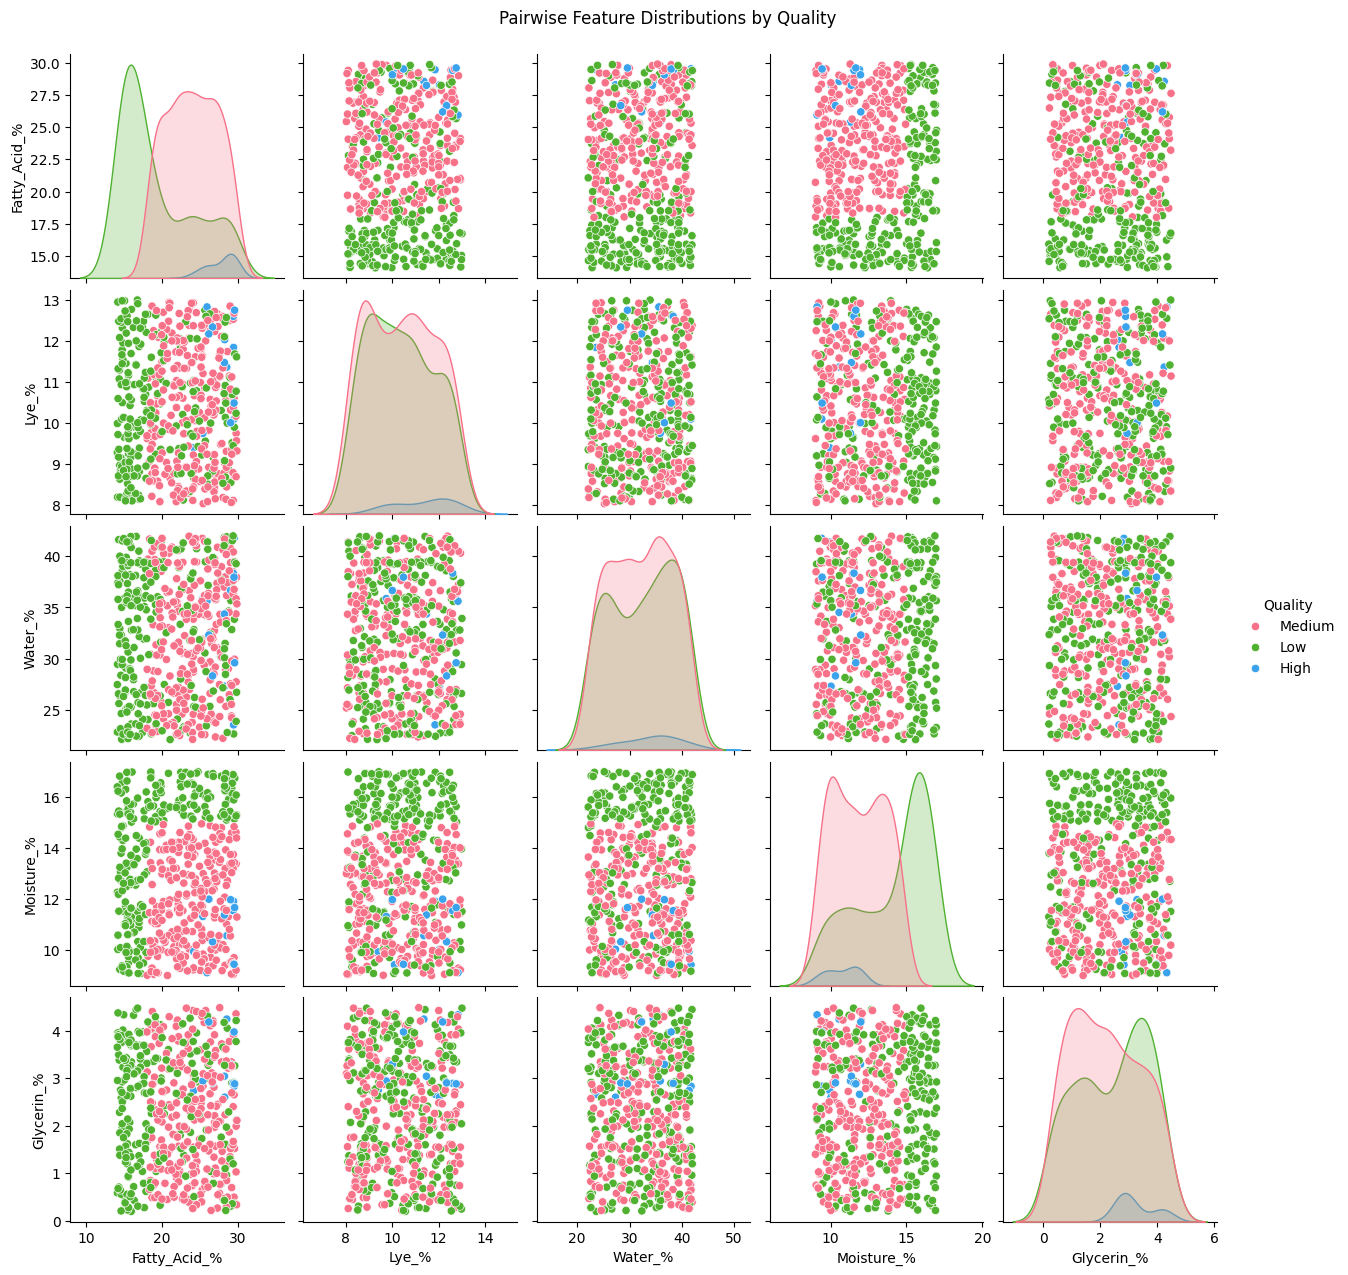

In [69]:
sns.pairplot(train_df, hue="Quality", vars=[
    "Fatty_Acid_%", "Lye_%", "Water_%", "Moisture_%", "Glycerin_%"
], palette="husl")
plt.suptitle("Pairwise Feature Distributions by Quality", y=1.02)
plt.show()

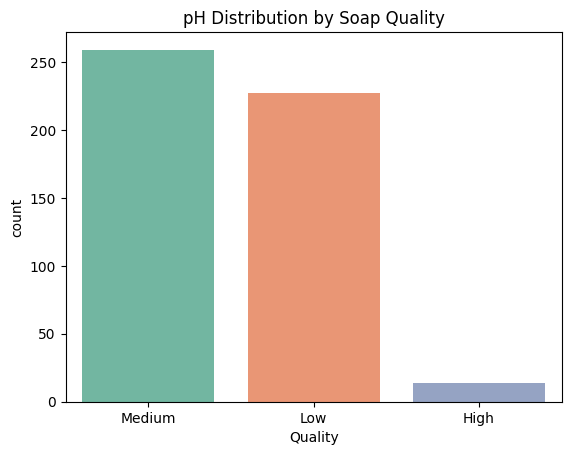

In [73]:
sns.countplot(data=train_df, x="Quality", hue="Quality", palette="Set2")
plt.title("pH Distribution by Soap Quality")
plt.show()

In [13]:
le = LabelEncoder()
train_df['Quality_Label'] = le.fit_transform(train_df['Quality'])  

In [14]:
X = train_df.drop(columns=['ID', 'Quality', 'Quality_Label']) 
y = train_df['Quality_Label'] 

In [15]:
train_df.head()

,ID,Fatty_Acid_%,Lye_%,Water_%,Fragrance_%,Temp_°C,Time_min,Curing_days,pH,Moisture_%,Glycerin_%,Additive_%,Colorant_%,Preservative_%,Batch_Size_L,Viscosity_cP,TDS_ppm,Quality,Quality_Label
0,1,19.99,11.49,25.70,1.54,53.8,44.8,25,8.02,12.98,2.08,0.95,2.96,1.07,79,573.4,458.3,Medium,2
1,2,29.21,10.68,32.84,1.46,53.4,42.9,11,8.73,16.34,2.90,4.59,0.83,1.99,29,864.7,150.5,Low,1
2,3,25.71,9.55,39.46,0.55,67.9,37.2,14,8.71,15.21,2.98,2.77,1.19,1.60,14,1248.7,149.3,Low,1
3,4,23.58,12.07,36.64,1.18,53.5,48.7,13,9.19,10.04,3.83,1.50,2.06,1.69,32,264.8,159.0,Medium,2
4,5,16.50,11.42,38.13,1.26,54.0,26.0,20,8.41,13.52,1.60,2.15,2.44,1.27,18,984.4,111.9,Low,1


In [16]:
train_df.drop(['ID', 'Fragrance_%', 'Temp_°C', 'Time_min', 'Additive_%', 'Colorant_%','Preservative_%', 'Batch_Size_L', 'Viscosity_cP', 'TDS_ppm'],axis=1,inplace=True)

In [17]:
train_df.head()

,Fatty_Acid_%,Lye_%,Water_%,Curing_days,pH,Moisture_%,Glycerin_%,Quality,Quality_Label
0,19.99,11.49,25.70,25,8.02,12.98,2.08,Medium,2
1,29.21,10.68,32.84,11,8.73,16.34,2.90,Low,1
2,25.71,9.55,39.46,14,8.71,15.21,2.98,Low,1
3,23.58,12.07,36.64,13,9.19,10.04,3.83,Medium,2
4,16.50,11.42,38.13,20,8.41,13.52,1.60,Low,1


In [18]:
nums_cols=train_df.select_dtypes(exclude='object').columns.tolist()

In [19]:
from sklearn.impute import SimpleImputer

In [20]:
imputer=SimpleImputer(strategy='mean')

In [26]:
imputer.fit(train_df[nums_cols])
train_df[nums_cols]=imputer.transform(train_df[nums_cols])

In [23]:
train_df.isna().sum()

Fatty_Acid_%     0
Lye_%            0
Water_%          0
Curing_days      0
pH               0
Moisture_%       0
Glycerin_%       0
Quality          0
Quality_Label    0
dtype: int64

In [27]:
train_df.describe()

,Fatty_Acid_%,Lye_%,Water_%,Curing_days,pH,Moisture_%,Glycerin_%,Quality_Label
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,21.976800,10.409540,32.350980,16.216000,8.608060,12.837600,2.335940,1.490000
std,4.779175,1.427418,5.943935,5.582084,0.461557,2.357177,1.224134,0.553636
min,14.080000,8.020000,22.100000,7.000000,7.810000,9.000000,0.200000,0.000000
25%,17.860000,9.147500,26.825000,11.000000,8.200000,10.727500,1.257500,1.000000
50%,22.210000,10.360000,32.795000,16.000000,8.620000,12.780000,2.370000,2.000000
75%,26.100000,11.632500,37.545000,21.000000,9.012500,14.957500,3.362500,2.000000
max,29.890000,13.000000,41.990000,25.000000,9.400000,16.980000,4.480000,2.000000


In [54]:
selected_columns = [
    "Fatty_Acid_%",
    "Lye_%",
    "Water_%",
    "Curing_days",
    "pH",
    "Moisture_%",
    "Glycerin_%"
]

In [55]:
X = train_df[selected_columns]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [59]:
model.score(X_train_scaled,y_train)

1.0

In [41]:
train_probs=model.predict_proba(X_train_scaled)
train_probs

array([[0.01, 0.04, 0.95],
       [0.01, 0.96, 0.03],
       [0.  , 0.05, 0.95],
       ...,
       [0.  , 0.03, 0.97],
       [0.02, 0.15, 0.83],
       [0.  , 0.01, 0.99]])

Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         4
         Low       1.00      1.00      1.00        44
      Medium       0.93      1.00      0.96        52

    accuracy                           0.96       100
   macro avg       0.64      0.67      0.65       100
weighted avg       0.92      0.96      0.94       100

Confusion Matrix:


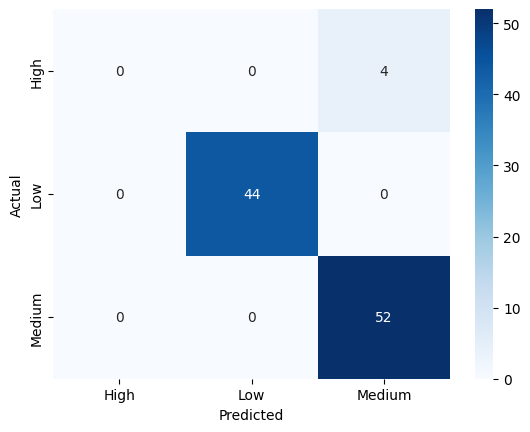

In [44]:
y_pred = model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_,zero_division=0))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', 
            xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [45]:
import joblib
joblib.dump(model, "soap_quality_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [74]:
new_data = pd.DataFrame([{
   "Fatty_Acid_%": 26.5,
    "Lye_%": 11,
    "Water_%": 28,
    "Curing_days": 20,
    "pH": 9.1,
    "Moisture_%": 10,
    "Glycerin_%": 3.5
}])
new_data_scaled = scaler.transform(new_data)
pred_label = model.predict(new_data_scaled)[0]
pred_quality = le.inverse_transform([pred_label])[0]
print("Predicted Quality:", pred_quality)

Predicted Quality: Medium


In [75]:
new_data = pd.DataFrame([{
    "Fatty_Acid_%": 96.5,
    "Lye_%": 13,
    "Water_%": 28,
    "Curing_days": 12,
    "pH": 9.8,
    "Moisture_%": 15,
    "Glycerin_%": 3.5
}])

# Scale and predict
new_data_scaled = scaler.transform(new_data)
pred_label = model.predict(new_data_scaled)[0]
pred_quality = le.inverse_transform([pred_label])[0]
print("Predicted Quality:", pred_quality)

Predicted Quality: Low


In [76]:
new_data = pd.DataFrame([{
    "Fatty_Acid_%": 29.59,
    "Lye_%": 12.75,
    "Water_%": 29.6,
    "Curing_days": 12,
    "pH": 9.22,
    "Moisture_%": 11.66,
    "Glycerin_%": 3.5
}])

# Scale and predict
new_data_scaled = scaler.transform(new_data)
pred_label = model.predict(new_data_scaled)[0]
pred_quality = le.inverse_transform([pred_label])[0]
print("Predicted Quality:", pred_quality)

Predicted Quality: High
